This notebook handles the plotting of the results figures for ROUND2 of the analysis. 
I increased the echo reception angle to +/- 30 degrees, from the previous +/- 15 degrees. I also altered the placement of echoes in the interpulse interval so that they were spread at equal intervals through the interpulse interval. In the previous version, the echoes were placed only in the first half of the interpulse interval. 

In [5]:
import copy
import os
import matplotlib.pyplot as plt
import numpy as np 
import pickle
from calc_num_IPIs import calc_num_IPIs_to_hear_echoes as nIPIs_to_mechoes
from calc_num_IPIs import calc_numtrials_per_echonumber 

In [6]:
%matplotlib notebook

In [9]:
pklpath = os.path.join('plots', 'round2_plotdata.pkl')

In [12]:
with open(pklpath, 'rb') as handle:
    plotdata = pickle.load(handle)


In [13]:
plotdata.keys()

['all_twice', 'all_once', 'median_once']

In [14]:
numtrials_all_data = plotdata['all_once']
numtrial_allechoes_twice = plotdata['all_twice']
numtrials_alldata_medianechoes = plotdata['median_once']

In [15]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

<IPython.core.display.Javascript object>


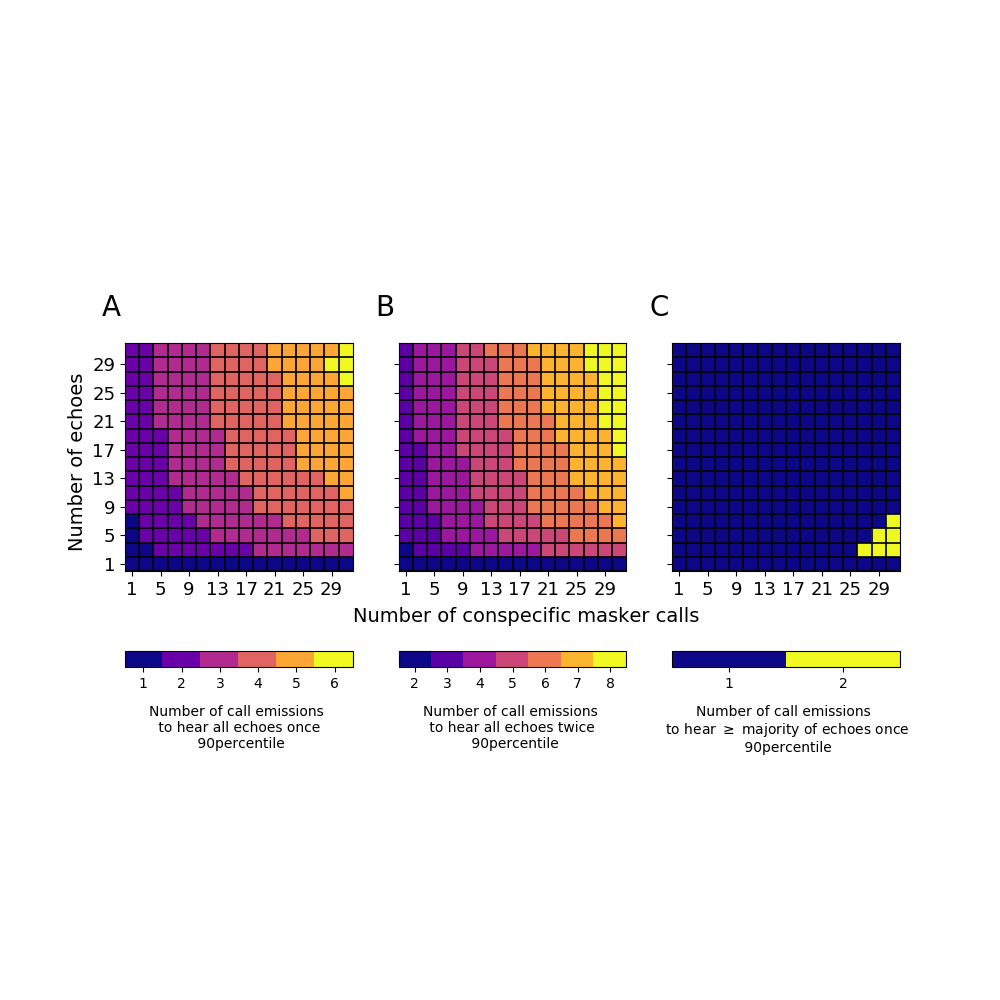

In [19]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(131)
im = ax.imshow(numtrials_all_data, aspect='equal', cmap=plt.cm.get_cmap('plasma', 6), 
                                   origin='lower',extent=[0.5,32.5,0.5,32.5])
ticks=np.arange(1,31,4)+0.5;
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)
plt.gca().tick_params(axis='both', which='major', labelsize=13)
ax.set_xticklabels(np.arange(1,31,4))
ax.set_yticklabels(np.arange(1,31,4))

grid_ticks = np.arange(1,33,2)
lwd = 1.2
ax.vlines(grid_ticks-0.5,0.5,32.5, linewidth=lwd)
ax.hlines(grid_ticks-0.5,0.5,32.5, linewidth=lwd)

divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="7%", pad=0.8, pack_start=True)
fig.add_axes(cax)
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label('Number of call emissions \n to hear all echoes once \n 90percentile', labelpad=10,
               fontsize=10)
cbar.set_ticks(np.array(np.linspace(0.08,0.92,6, endpoint=True))*5 + 1)
cbar.set_ticklabels([1,2,3,4,5,6])
plt.text(-0.25,17.5, 'Number of echoes',
        fontsize=14, rotation=90)
plt.text(-0.1, 22, 'A', fontsize=20)

plt.show()
##################

ax1 = plt.subplot(132)

im1 = ax1.imshow(numtrial_allechoes_twice, aspect='equal', cmap=plt.cm.get_cmap('plasma', 7), 
                                   origin='lower',extent=[0.5,32.5,0.5,32.5])
ticks=np.arange(1,31,4)+0.5;
plt.gca().set_xticks(ticks); 
plt.gca().set_yticks(ticks)
plt.gca().tick_params(axis='both', which='major', labelsize=13)
ax1.set_xticklabels(np.arange(1,31,4))
ax1.set_yticklabels([])

grid_ticks = np.arange(1,33,2)
ax1.vlines(grid_ticks-0.5,0.5,32.5, linewidth=lwd)
ax1.hlines(grid_ticks-0.5,0.5,32.5, linewidth=lwd)

divider = make_axes_locatable(ax1)
cax1 = divider.new_vertical(size="7%", pad=0.8, pack_start=True)
fig.add_axes(cax1)
cbar1 = fig.colorbar(im1, cax=cax1, orientation="horizontal")
cbar1.set_label('Number of call emissions \n to hear all echoes twice \n 90percentile',
               labelpad=10, fontsize=10)
cbar1.set_ticks(np.linspace(1/14.0, 13/14.0,7)*6 + 2 )
cbar1.set_ticklabels([2,3,4,5,6,7,8])
cbar1.update_ticks()
plt.text(-0.2, 2.8, 'Number of conspecific masker calls',
        fontsize=14)
plt.text(-0.1, 22, 'B', fontsize=20)
plt.show()

######

ax2 = plt.subplot(133)
im2 = ax2.imshow(numtrials_alldata_medianechoes, aspect='equal', cmap=plt.cm.get_cmap('plasma', 2), 
                                   origin='lower',extent=[0.5,32.5,0.5,32.5])
ticks=np.arange(1,31,4)+0.5;
plt.gca().set_xticks(ticks); 
plt.gca().set_yticks(ticks)
plt.gca().tick_params(axis='both', which='major', labelsize=13)
ax2.set_xticklabels(np.arange(1,31,4))
ax2.set_yticklabels([])

grid_ticks = np.arange(1,33,2)
ax2.vlines(grid_ticks-0.5,0.5,32.5, linewidth=lwd)
ax2.hlines(grid_ticks-0.5,0.5,32.5, linewidth=lwd)

divider = make_axes_locatable(ax2)
cax2 = divider.new_vertical(size="7%", pad=0.8, pack_start=True)
fig.add_axes(cax2)
cbar2 = fig.colorbar(im2, cax=cax2, orientation="horizontal")
cbar2.set_label('Number of call emissions \n to hear $\geq $ majority of echoes once \n 90percentile',
               labelpad=10, fontsize=10)
cbar2.set_ticks([1.25,1.75])
cbar2.set_ticklabels([1,2])
cbar2.update_ticks()
plt.text(-0.1, 22, 'C', fontsize=20)
plt.show()


plt.savefig(os.path.join('plots','multipanel_numcallemissions_ROUND2.png'), dpi=400,pad_inches = 0, bbox_inches='tight')